In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [8]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [3]:
# Convert 'Date Time' from object to datetime, then make it as index
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head() #Data is collected every 10 minutes

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Column selection: use 'T (deg C)' only

<Axes: xlabel='Date Time'>

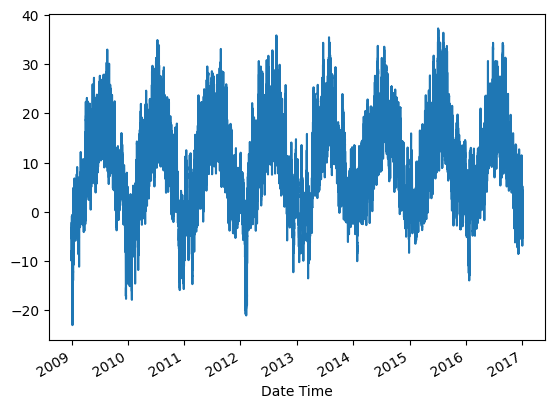

In [6]:
temp = df['T (degC)']
temp.plot()

In [25]:
temp # only use T (deg C) column

Date Time
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
                       ... 
2016-12-31 23:20:00   -4.05
2016-12-31 23:30:00   -3.35
2016-12-31 23:40:00   -3.16
2016-12-31 23:50:00   -4.23
2017-01-01 00:00:00   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [68]:
temp.shape

(420551,)

# Data Preprocessing

In [4]:
# windowing dataset >> make time series data into the form of supervised learning data
# [[[1], [2], [3], [4], [5], [6], [7], [8], [9]]] [10]
# [[[2], [3], [4], [5], [6], [7], [8], [9], [10]]] [11]
# [[[3], [4], [5], [6], [7], [8], [9], [10], [11]]] [12]

def df_to_X_y(df, window_size=9):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
        
    return np.array(X), np.array(y)

In [7]:
# create windowed dataset
X, y = df_to_X_y(temp, window_size=9)
print(X.shape, y.shape)

(420542, 9, 1) (420542,)


## Splitting data

In [8]:
# how if i split it manually
X_train, y_train = X[:294385], y[:294385]
X_valid, y_valid = X[294385:357463], y[294385:357463]
X_test, y_test = X[357463:], y[357463:]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(294385, 9, 1) (294385,) (63078, 9, 1) (63078,) (63079, 9, 1) (63079,)


# Modeling

In [12]:
# construct model
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(9,1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# save best weights only
cp1 = ModelCheckpoint('simple_model/', save_best_only=True)

# model compiling
simple_model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[RootMeanSquaredError()]
)

# model training
simple_model.fit(X_train,
                 y_train,
                 validation_data = (X_valid, y_valid),
                 epochs=10,
                callbacks=cp1)

Epoch 1/10
9200/9200 [==============================] - ETA: 0s - loss: 0.5115 - root_mean_squared_error: 0.7152

INFO:tensorflow:Assets written to: simple_model\assets


INFO:tensorflow:Assets written to: simple_model\assets


9200/9200 [==============================] - 111s 12ms/step - loss: 0.5115 - root_mean_squared_error: 0.7152 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2208
Epoch 2/10
9200/9200 [==============================] - 159s 17ms/step - loss: 0.0480 - root_mean_squared_error: 0.2190 - val_loss: 0.0585 - val_root_mean_squared_error: 0.2418
Epoch 3/10
9197/9200 [============================>.] - ETA: 0s - loss: 0.0468 - root_mean_squared_error: 0.2163

INFO:tensorflow:Assets written to: simple_model\assets


INFO:tensorflow:Assets written to: simple_model\assets


9200/9200 [==============================] - 155s 17ms/step - loss: 0.0468 - root_mean_squared_error: 0.2163 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2102
Epoch 4/10
9200/9200 [==============================] - 147s 16ms/step - loss: 0.0463 - root_mean_squared_error: 0.2152 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2354
Epoch 5/10
9200/9200 [==============================] - 152s 17ms/step - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.0555 - val_root_mean_squared_error: 0.2357
Epoch 6/10
9197/9200 [============================>.] - ETA: 0s - loss: 0.0454 - root_mean_squared_error: 0.2130

INFO:tensorflow:Assets written to: simple_model\assets


INFO:tensorflow:Assets written to: simple_model\assets


9200/9200 [==============================] - 145s 16ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2092
Epoch 7/10
9200/9200 [==============================] - 141s 15ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130 - val_loss: 0.0521 - val_root_mean_squared_error: 0.2283
Epoch 8/10
9199/9200 [============================>.] - ETA: 0s - loss: 0.0451 - root_mean_squared_error: 0.2125

INFO:tensorflow:Assets written to: simple_model\assets


INFO:tensorflow:Assets written to: simple_model\assets


9200/9200 [==============================] - 156s 17ms/step - loss: 0.0451 - root_mean_squared_error: 0.2125 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2080
Epoch 9/10
9200/9200 [==============================] - 132s 14ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_loss: 0.0632 - val_root_mean_squared_error: 0.2514
Epoch 10/10
9200/9200 [==============================] - 139s 15ms/step - loss: 0.0448 - root_mean_squared_error: 0.2116 - val_loss: 0.0630 - val_root_mean_squared_error: 0.2509


# Model prediction and evaluation

### In the train set

In [13]:
train_predictions = simple_model.predict(X_train).flatten()
error = train_predictions - y_train
train_results = pd.DataFrame(data={'Train Predictions':train_predictions,
                                  'Actuals':y_train,
                                'Error': error
                                 })
train_results

9200/9200 [==============================] - 56s 6ms/step


,Train Predictions,Actuals,Error
0,-7.976767,-8.43,0.453233
1,-8.571842,-8.76,0.188158
2,-8.846322,-8.88,0.033678
3,-8.946964,-8.85,-0.096964
4,-8.898380,-8.83,-0.068380
...,...,...,...
294380,13.798767,13.83,-0.031233
294381,13.990940,13.82,0.170940
294382,13.896066,13.73,0.166066
294383,13.797081,13.68,0.117081


In [14]:
print('RMSE in validation set:', np.sqrt(mean_squared_error(train_predictions, y_train)))

RMSE in validation set: 0.241081657332148


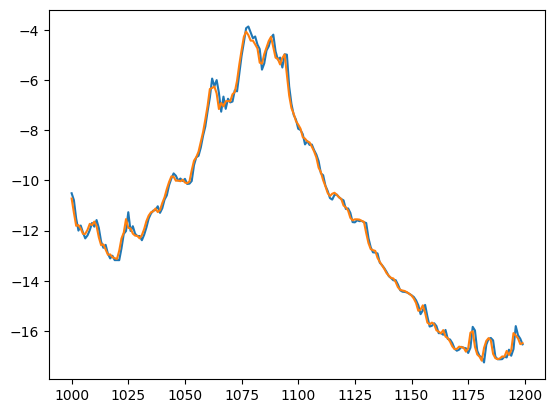

In [22]:
# visualizing result

plt.plot(train_results['Train Predictions'][1000:1200])
plt.plot(train_results['Actuals'][1000:1200])

### In the validation set

In [20]:
valid_predictions = simple_model.predict(X_valid).flatten()
error = valid_predictions - y_valid
valid_results = pd.DataFrame(data={'Validation Predictions':valid_predictions,
                                  'Actuals':y_valid,
                                'Error': error
                                 })
valid_results

1972/1972 [==============================] - 9s 5ms/step


,Validation Predictions,Actuals,Error
0,13.602425,13.53,0.072425
1,13.657204,13.53,0.127204
2,13.644547,13.50,0.144547
3,13.601719,13.46,0.141719
4,13.556952,13.46,0.096952
...,...,...,...
63073,6.722168,6.55,0.172168
63074,6.531372,6.58,-0.048628
63075,6.665967,6.53,0.135967
63076,6.535796,6.57,-0.034204


In [21]:
print('RMSE in validation set:', np.sqrt(mean_squared_error(valid_predictions, y_valid)))

RMSE in validation set: 0.25090695869182256


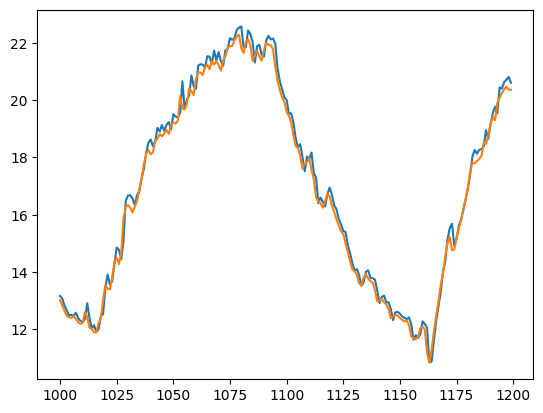

In [23]:
# visualizing result

plt.plot(valid_results['Validation Predictions'][1000:1200])
plt.plot(valid_results['Actuals'][1000:1200])

### In the test set

In [24]:
test_predictions = simple_model.predict(X_test).flatten()
error = test_predictions - y_test
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,
                                  'Actuals':y_test,
                                  'Error':error
                                 })
test_results

1972/1972 [==============================] - 11s 5ms/step


,Test Predictions,Actuals,Error
0,6.573970,6.47,0.103970
1,6.472968,6.47,0.002968
2,6.527656,6.52,0.007656
3,6.589948,6.46,0.129948
4,6.461261,6.47,-0.008739
...,...,...,...
63074,-4.093833,-4.05,-0.043833
63075,-4.076187,-3.35,-0.726187
63076,-2.922138,-3.16,0.237862
63077,-3.165962,-4.23,1.064038


In [25]:
print('RMSE in test set:', np.sqrt(mean_squared_error(test_predictions, y_test)))

RMSE in test set: 0.23278547817268044


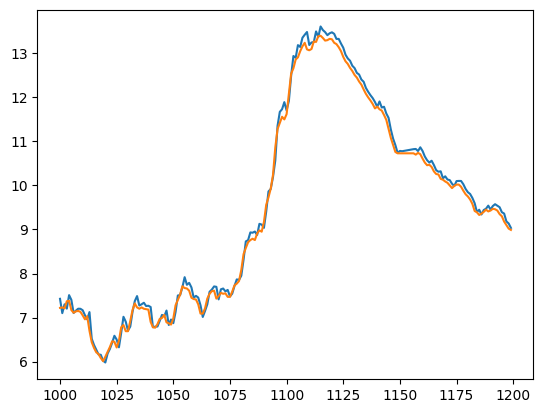

In [26]:
# visualizing result

plt.plot(test_results['Test Predictions'][1000:1200])
plt.plot(test_results['Actuals'][1000:1200])